In [31]:
import matplotlib.font_manager as font_manager
import matplotlib.dates as matdates
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from os.path import expanduser
import matplotlib as mpl
import seaborn as sns


sns.set_style("ticks")
fontpath = expanduser('LinLibertine_DRah.ttf')
prop = font_manager.FontProperties(fname=fontpath)

params = {
    'axes.labelsize': 12,
    'font.size': 12,
    'legend.fontsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'font.family': prop.get_name(),
    'text.usetex': False
}
mpl.rcParams.update(params)

In [35]:
from datetime import datetime, timedelta
from os.path import expanduser
import pandas as pd
import numpy as np

cats = ["Alt-right", "Alt-lite", "I.D.W.", "Control"]
names = ["Alt-right", "Alt-lite", "IDW", "control"]
colors = {"Alt-right": "#f93e49", "Alt-lite": "#F29F05", "I.D.W.": "#019441", "Control": "#35598a"}
x_label = ["2016", "2017", "2018"]
lines = ['-', '--', '-.', ':']
df_path = "./../data/sentiment/dataframes/"
img_path = "./../imgs/"

In [36]:
def human_format(num, pos=None):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    # add more suffixes if you need them
    return '%.2f%s' % (num, ['', 'K', 'M', 'B', 'T', 'P'][magnitude])

# Polarity

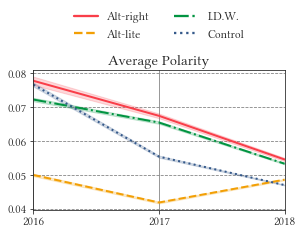

In [40]:
fig = plt.figure(
    constrained_layout=False,
    figsize=(4.5, 2.5),
)
gs = fig.add_gridspec(nrows=1, ncols=1, wspace=0.3, hspace=0.25, top=0.90)

# adds subplots
ax1 = fig.add_subplot(gs[0, 0])

blob_df_path = df_path + "text_blob_df/time/"
pol = []
for name in names:
    pol.append(pd.read_csv(f"{blob_df_path}{name}_pol.csv"))

axs = [ax1]

for i in range(len(cats)):
    ax1.plot(x_label, pol[i].y[2:], lines[i], linewidth=2, color=colors[cats[i]])

for i in range(len(cats)):
    ax1.fill_between(x_label, pol[i]["dyd"][2:], pol[i]["dyu"][2:], alpha=0.2, color=colors[cats[i]])

ax1.set_title("Average Polarity", fontsize=15)
ax1.set_xlim("2016", "2018")    

# Adds legend on the top
leg = ax1.legend(cats,
           loc='upper center',
           bbox_to_anchor=(0.5, 1.5),
           ncol=2,
           fancybox=False,
           shadow=False,
           frameon=False,
           edgecolor=None,
           fontsize=12)

for line in leg.get_lines():
    line.set_linewidth(2.3)
    
# Common axis config, grids, etc
for ax in axs:
    ax.xaxis.grid(color='gray', linestyle='solid')
    ax.yaxis.grid(color='gray', linestyle='dashed')
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(human_format))
    ax.set_xlabel("")
    ax.set_ylabel("")

# Adds labels
#_ = ax1.set_ylabel("Polarity Mean")

# Save figs
plt.savefig(f"{img_path}textblob/time/average_polarity.pdf", bbox_inches = 'tight')
plt.savefig(f"{img_path}textblob/time/average_polarity.png", bbox_inches = 'tight')

# Empath

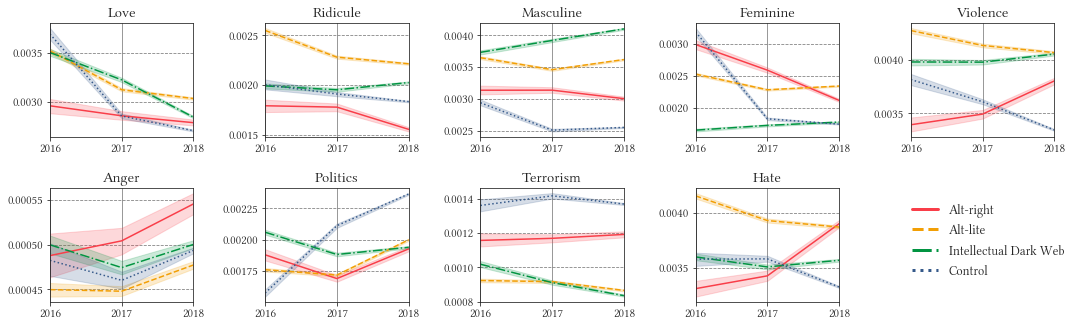

In [8]:
emotion_list = ['love', 'ridicule', 'masculine', 'feminine',
                'violence','anger','politics', 'terrorism','hate']

empath = []
empath_df_path = df_path + "empath_df/"
for name in names:
    empath.append(pd.read_csv(f"{empath_df_path}{name}_empath_new.csv"))

fig = plt.figure(
    constrained_layout=False,
    figsize=(18, 5),
)
gs = fig.add_gridspec(nrows=2, ncols=5, wspace=0.5, hspace=0.45, top=0.90)

# adds subplots
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[0, 3])
ax5 = fig.add_subplot(gs[0, 4])
ax6 = fig.add_subplot(gs[1, 0], sharex=ax1)
ax7 = fig.add_subplot(gs[1, 1], sharex=ax2)
ax8 = fig.add_subplot(gs[1, 2], sharex=ax3)
ax9 = fig.add_subplot(gs[1, 3], sharex=ax3)
#ax10 = fig.add_subplot(gs[1, 4], sharex=ax3)

axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]

# Plots cdfs on the top plots
for ax, emotion in zip(axs, emotion_list):
    for i in range(len(names)):
        ax.plot(x_label, empath[i][emotion], lines[i], color=colors[cats[i]])
        ax.fill_between(x_label, empath[i][f"{emotion}_dyd"], empath[i][f"{emotion}_dyu"],
                        alpha=0.2, color=colors[cats[i]])   

    
    # Sets ticks, titles and limits
    ax.set_title(emotion.capitalize(), fontsize=15)
    ax.set_xlim("2016", "2018")
    

# Adds legend on the top
leg = ax9.legend(cats,
           loc='lower right',
           bbox_to_anchor=(2.65, 0.1),
           ncol=1,
           fancybox=False,
           shadow=False,
           frameon=False,
           edgecolor=None,
           fontsize=13)



for line in leg.get_lines():
    line.set_linewidth(3.0)

# Common axis config, grids, etc
for ax in axs:
    ax.xaxis.grid(color='gray', linestyle='solid')
    ax.yaxis.grid(color='gray', linestyle='dashed')
    ax.xaxis.set_tick_params(rotation=0)
    ax.set_xlabel("")
    ax.set_ylabel("")

# Adds labels

# Saves figs
plt.savefig(f"{img_path}empath/time/empath_mean.pdf", bbox_inches = 'tight')
plt.savefig(f"{img_path}empath/time/empath_mean.png", bbox_inches = 'tight')


# Empath Polarity

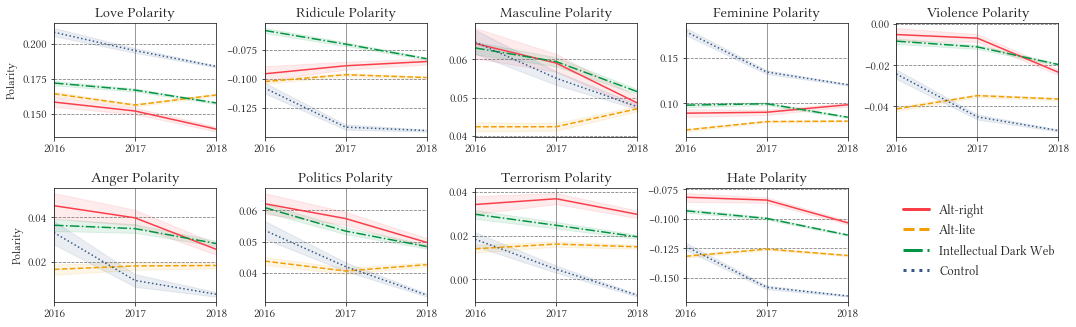

In [28]:
y = []
emp_pol_df_path = df_path + "empath_blob_df/time/"
for name in names:
    y.append(pd.read_csv(f"{emp_pol_df_path}{name}_pol_empath_prop_boots.csv"))
    
fig = plt.figure(
    constrained_layout=False,
    figsize=(18, 5),
)
gs = fig.add_gridspec(nrows=2, ncols=5, wspace=0.3, hspace=0.45, top=0.90)

# adds subplots
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[0, 3])
ax5 = fig.add_subplot(gs[0, 4])
ax6 = fig.add_subplot(gs[1, 0], sharex=ax1)
ax7 = fig.add_subplot(gs[1, 1], sharex=ax2)
ax8 = fig.add_subplot(gs[1, 2], sharex=ax3)
ax9 = fig.add_subplot(gs[1, 3], sharex=ax3)
#ax10 = fig.add_subplot(gs[1, 4], sharex=ax3)

axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]

# Plots cdfs on the top plots
for ax, emotion in zip(axs, emotion_list):
    for i in range(len(names)):
        ax.plot(x_label, y[i][emotion][2:], lines[i], color=colors[cats[i]])
        ax.fill_between(x_label, y[i][f"{emotion}_dyd"][2:],
                                   y[i][f"{emotion}_dyu"][2:], alpha=0.1, color=colors[cats[i]])   

    
    # Sets ticks, titles and limits
    ax.set_title(f'{emotion.capitalize()} Polarity', fontsize=15)
    ax.set_xlim("2016", "2018")
    

# Adds legend on the top
leg = ax9.legend(cats,
           loc='lower right',
           bbox_to_anchor=(2.35, 0.1),
           ncol=1,
           fancybox=False,
           shadow=False,
           frameon=False,
           edgecolor=None,
           fontsize=13)



for line in leg.get_lines():
    line.set_linewidth(3.0)

# Common axis config, grids, etc
for ax in axs:
    ax.xaxis.grid(color='gray', linestyle='solid')
    ax.yaxis.grid(color='gray', linestyle='dashed')
    ax.xaxis.set_tick_params(rotation=0)
    ax.set_xlabel("")
    ax.set_ylabel("")

# Adds labels
_ = ax1.set_ylabel("Polarity")
_ = ax6.set_ylabel("Polarity")

# Saves figs
plt.savefig(f"{img_path}empath_blob/time/empath_polarity.png", bbox_inches = 'tight')
plt.savefig(f"{img_path}empath_blob/time/empath_polarity.pdf", bbox_inches = 'tight')


# Perspective

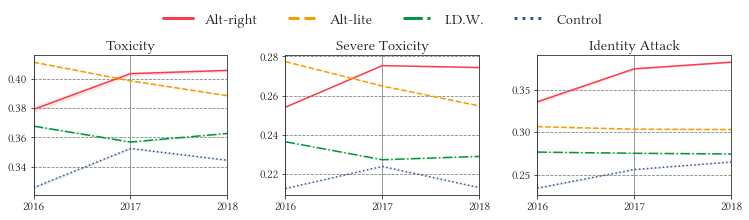

In [43]:
attributes = ['TOXICITY', 'SEVERE_TOXICITY', 'IDENTITY_ATTACK']
attr = ['Toxicity', "Severe Toxicity", "Identity Attack"]
attr_plots = dict(zip(attributes, attr))
persp_df_path = df_path + "perspective_df/"
perspective = []
for name in names:
    perspective.append(pd.read_csv(f"{persp_df_path}{name}_perspective_new.csv"))
    
fig = plt.figure(
    constrained_layout=False,
    figsize=(12.5, 2.5),
)
gs = fig.add_gridspec(nrows=1, ncols=3, wspace=0.3, hspace=0.45, top=0.90)

# adds subplots
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
#ax10 = fig.add_subplot(gs[1, 4], sharex=ax3)

axs = [ax1, ax2, ax3]

# Plots cdfs on the top plots
for ax, emotion in zip(axs, attributes):
    for i in range(len(names)):
        ax.plot(x_label, perspective[i][emotion], lines[i], color=colors[cats[i]])
        ax.fill_between(x_label, perspective[i][f"{emotion}_dyd"],
                                   perspective[i][f"{emotion}_dyu"], alpha=0.1, color=colors[cats[i]])

    
    # Sets ticks, titles and limits
    ax.set_title(attr_plots[emotion], fontsize=15)
    ax.set_xlim("2016", "2018")
    

# Adds legend on the top
leg = ax2.legend(cats,
           loc='upper center',
           bbox_to_anchor=(0.5, 1.4),
           ncol=4,
           fancybox=False,
           shadow=False,
           frameon=False,
           edgecolor=None,
           fontsize=15)


for line in leg.get_lines():
    line.set_linewidth(3.0)

# Common axis config, grids, etc
for ax in axs:
    ax.xaxis.grid(color='gray', linestyle='solid')
    ax.yaxis.grid(color='gray', linestyle='dashed')
    ax.xaxis.set_tick_params(rotation=0)
    ax.set_xlabel("")
    ax.set_ylabel("")

# Adds labels

# Saves figs
plt.savefig(f"{img_path}perspective/time/perspective_mean.pdf", bbox_inches = 'tight')    
plt.savefig(f"{img_path}perspective/time/perspective_mean.png", bbox_inches = 'tight')    
